<h1>Transportation problem</h1>

In [1]:
!pip install pulp

     |████████████████████████████████| 40.6MB 107kB/s 


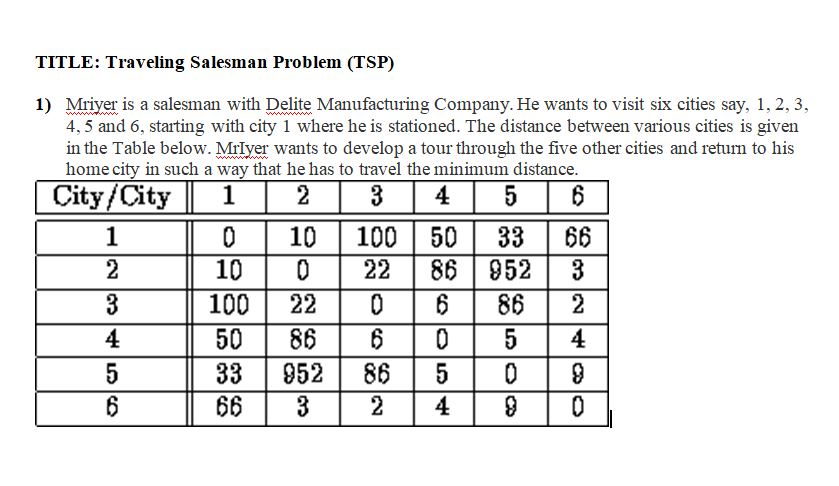

In [7]:
from pulp import *
import numpy as np
import pandas as pd

In [161]:
df=pd.read_csv('ques2.csv')

sites=df.columns.tolist()

cost=df.iloc[0:7,0:7].to_numpy() 
#cost=cost.flatten()

c=0
j=0
distances={}
for a in cities:
  c=0
  for b in cities:
    if(a!=b):
      distances[(a,b)]=cost[c][j]
    c=c+1
  j=j+1
distances


{('c1', 'c2'): 10,
 ('c1', 'c3'): 100,
 ('c1', 'c4'): 50,
 ('c1', 'c5'): 33,
 ('c1', 'c6'): 66,
 ('c2', 'c1'): 10,
 ('c2', 'c3'): 22,
 ('c2', 'c4'): 86,
 ('c2', 'c5'): 952,
 ('c2', 'c6'): 3,
 ('c3', 'c1'): 100,
 ('c3', 'c2'): 22,
 ('c3', 'c4'): 6,
 ('c3', 'c5'): 86,
 ('c3', 'c6'): 2,
 ('c4', 'c1'): 50,
 ('c4', 'c2'): 86,
 ('c4', 'c3'): 6,
 ('c4', 'c5'): 5,
 ('c4', 'c6'): 4,
 ('c5', 'c1'): 33,
 ('c5', 'c2'): 952,
 ('c5', 'c3'): 86,
 ('c5', 'c4'): 5,
 ('c5', 'c6'): 9,
 ('c6', 'c1'): 66,
 ('c6', 'c2'): 3,
 ('c6', 'c3'): 2,
 ('c6', 'c4'): 4,
 ('c6', 'c5'): 9}

In [162]:
#create the problme
prob=LpProblem("salesman",LpMinimize)


In [163]:
#indicator variable if site i is connected to site j in the tour
x = LpVariable.dicts('x',distances, 0,1,LpBinary)

  #the objective
cost = lpSum([x[(i,j)]*distances[(i,j)] for (i,j) in distances])
prob+=cost

In [164]:
#the objective
cost = lpSum([x[(i,j)]*distances[(i,j)] for (i,j) in distances])
prob+=cost



/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1530: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [166]:
for k in sites:
    #every site has exactly one inbound connection
    prob+= lpSum([ x[(i,k)] for i in sites if (i,k) in x]) ==1
    #every site has exactly one outbound connection
    prob+=lpSum([ x[(k,i)] for i in sites if (k,i) in x]) ==1

In [167]:
#we need to keep track of the order in the tour to eliminate the possibility of subtours
u = LpVariable.dicts('u', sites, 0, len(sites)-1, LpInteger)

In [168]:
#subtour elimination
N=len(sites)
for i in sites:
    for j in sites:
        if i != j and (i != 'c1' and j!= 'c1') and (i,j) in x:
            prob += u[i] - u[j] <= (N)*(1-x[(i,j)]) - 1

prob

salesman:
MINIMIZE
10*x_('c1',_'c2') + 100*x_('c1',_'c3') + 50*x_('c1',_'c4') + 33*x_('c1',_'c5') + 66*x_('c1',_'c6') + 10*x_('c2',_'c1') + 22*x_('c2',_'c3') + 86*x_('c2',_'c4') + 952*x_('c2',_'c5') + 3*x_('c2',_'c6') + 100*x_('c3',_'c1') + 22*x_('c3',_'c2') + 6*x_('c3',_'c4') + 86*x_('c3',_'c5') + 2*x_('c3',_'c6') + 50*x_('c4',_'c1') + 86*x_('c4',_'c2') + 6*x_('c4',_'c3') + 5*x_('c4',_'c5') + 4*x_('c4',_'c6') + 33*x_('c5',_'c1') + 952*x_('c5',_'c2') + 86*x_('c5',_'c3') + 5*x_('c5',_'c4') + 9*x_('c5',_'c6') + 66*x_('c6',_'c1') + 3*x_('c6',_'c2') + 2*x_('c6',_'c3') + 4*x_('c6',_'c4') + 9*x_('c6',_'c5') + 0
SUBJECT TO
_C1: x_('c2',_'c1') + x_('c3',_'c1') + x_('c4',_'c1') + x_('c5',_'c1')
 + x_('c6',_'c1') = 1

_C2: x_('c1',_'c2') + x_('c1',_'c3') + x_('c1',_'c4') + x_('c1',_'c5')
 + x_('c1',_'c6') = 1

_C3: x_('c1',_'c2') + x_('c3',_'c2') + x_('c4',_'c2') + x_('c5',_'c2')
 + x_('c6',_'c2') = 1

_C4: x_('c2',_'c1') + x_('c2',_'c3') + x_('c2',_'c4') + x_('c2',_'c5')
 + x_('c2',_'c6') = 1



In [169]:
%time prob.solve()
print(LpStatus[prob.status])

CPU times: user 3.03 ms, sys: 3.91 ms, total: 6.94 ms
Wall time: 63 ms
Optimal


In [173]:


sites_left = sites.copy()
org = 'c1'
tour=[]
tour.append(sites_left.pop( sites_left.index(org)))

while len(sites_left) > 0:
    
    for k in sites_left:
        if x[(org,k)].varValue ==1:
            tour.append( sites_left.pop( sites_left.index(k)))
            org=k
            break
            
tour.append('c1')

tour_legs = [distances[(tour[i-1], tour[i])] for i in range(1,len(tour))]

print('Found optimal tour!')
print(' -> '.join(tour))

sum(tour_legs)

Found optimal tour!
c1 -> c5 -> c4 -> c3 -> c6 -> c2 -> c1


59